In [1]:
RESULTS_ZIP_FILE = "../../results/webUI2Code/webUI2Code_4096.zip"
RESULTS_FOLDER_DESTINATION = "../../results/webUI2Code/"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [11]:
RESULTS_FOLDER = "../../results/webUI2Code/webUI2Code_4096/"

In [4]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

466

In [5]:
#%run ../../utils/postprocessing.py --folder ../../results/webUI2Code/webUI2Code_4096 --webui2code --suffix .txt      

In [ ]:
#%run ../../utils/postprocessing.py --folder ../../results/webUI2Code/webUI2Code_4096

In [5]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/webUI2Code/webUI2COde_4096 --webui2code

In [12]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [13]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [14]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [15]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index
count,233.000,233.000,233.000,233.000,233.000,233.000,233.000,233.000,233.000,221.000
mean,6967.163,5862.009,8375.815,0.436,6920.180,0.714,0.433,80.558,0.691,0.547
std,5209.937,2583.449,4788.965,0.210,3087.700,0.108,0.227,57.073,0.286,0.249
min,0.000,571.000,821.000,0.000,252.000,0.166,0.000,0.000,0.000,0.001
25%,4131.000,4111.000,5621.000,0.266,5155.000,0.658,0.254,52.000,0.602,0.367
50%,5463.000,5834.000,6996.000,0.477,6008.000,0.726,0.457,76.000,0.735,0.620
75%,7241.000,7301.000,10032.000,0.605,8129.000,0.779,0.621,102.000,0.906,0.746
max,29513.000,16475.000,29513.000,0.835,21535.000,0.960,0.954,335.000,1.031,0.990


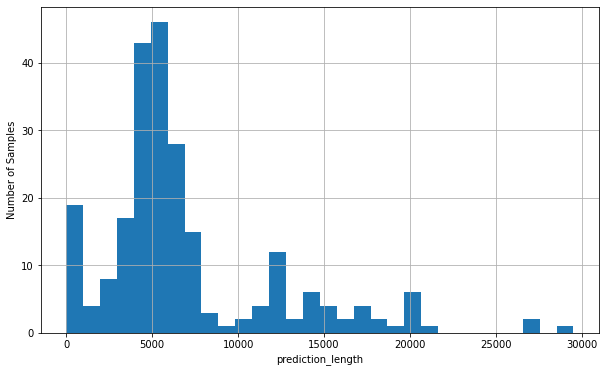

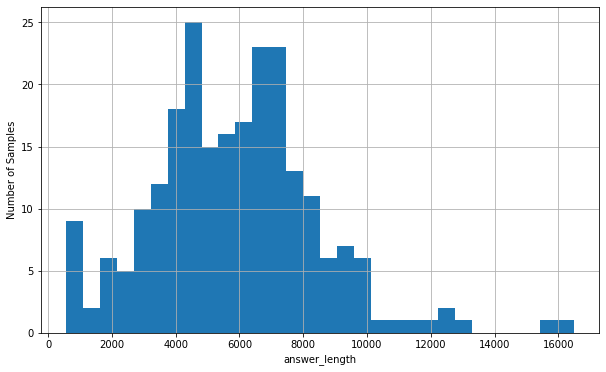

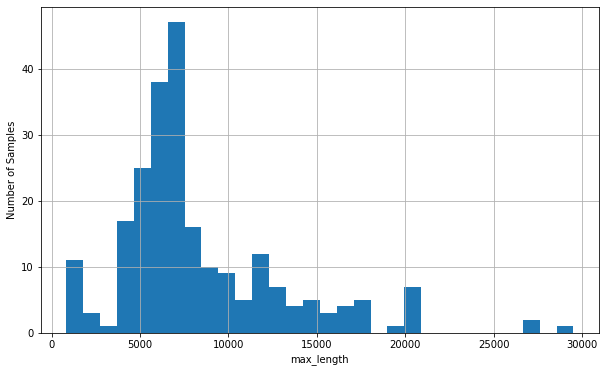

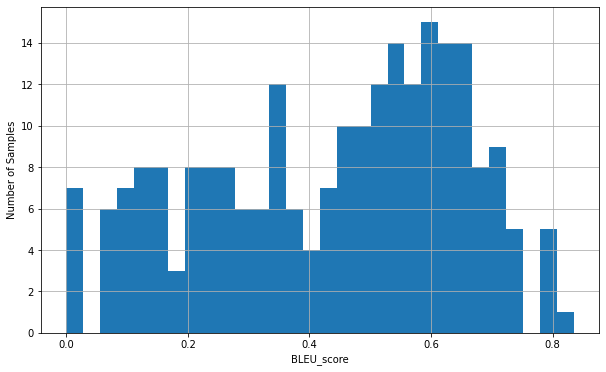

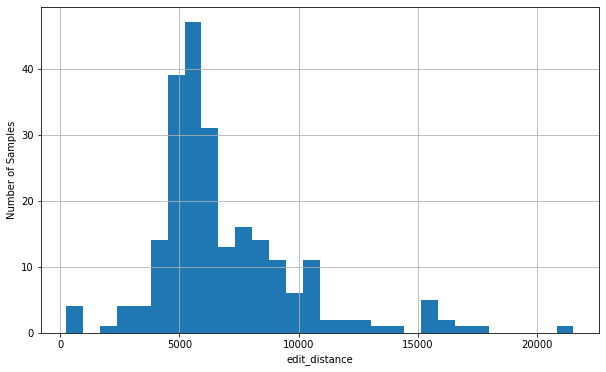

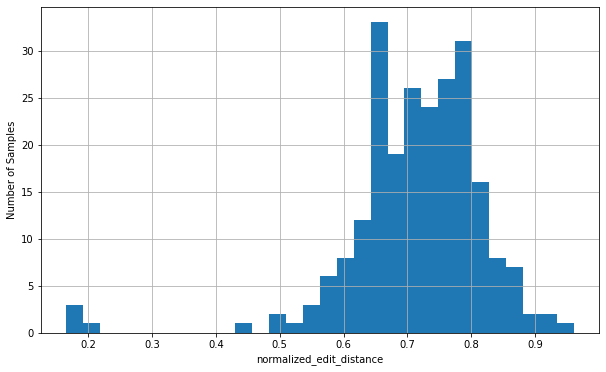

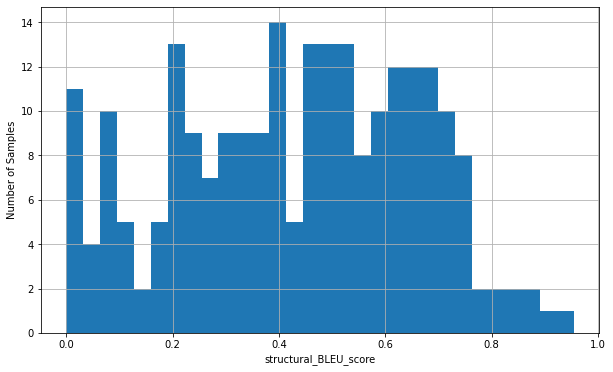

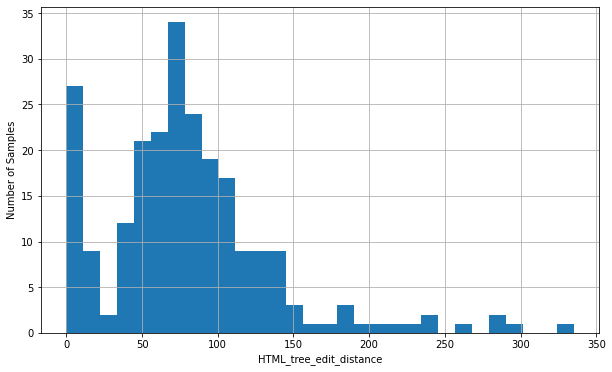

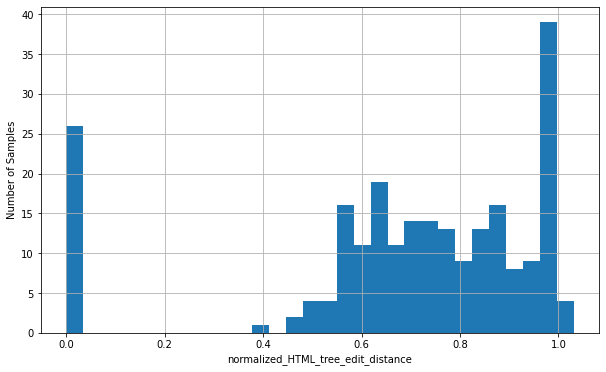

In [6]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance", "structural_BLEU_score", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


In [7]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    if data.get('token_not_found') is False and data.get('title_not_found') is False:
    #if data.get('title_not_found') is False:
            dataframes.append(pd.DataFrame([data])) 

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [8]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
}, inplace=True)


In [9]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [10]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance
count,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000
mean,4969.628,5967.197,6666.771,0.498,5813.207,0.691,0.464,82.856,0.704
std,2318.980,2607.751,2617.383,0.177,1675.479,0.105,0.220,54.169,0.269
min,457.000,821.000,821.000,0.000,252.000,0.166,0.000,0.000,0.000
25%,3942.250,4394.750,5298.500,0.369,5037.750,0.653,0.312,54.000,0.594
50%,5088.000,5893.500,6543.500,0.530,5676.000,0.702,0.493,78.000,0.739
75%,5986.500,7288.000,7593.000,0.627,6638.500,0.751,0.637,103.250,0.907
max,12371.000,16475.000,16475.000,0.835,10114.000,0.922,0.954,335.000,1.031


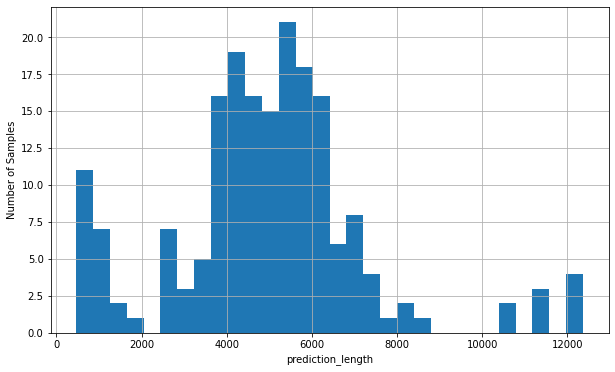

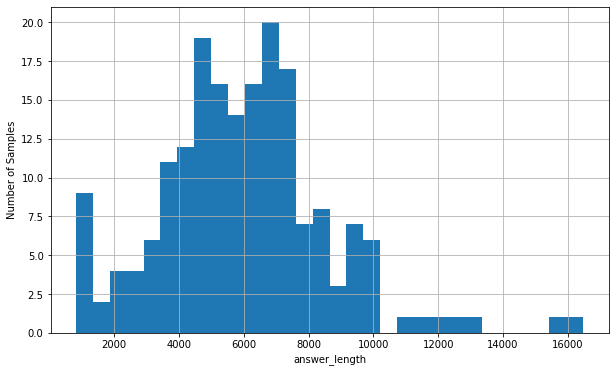

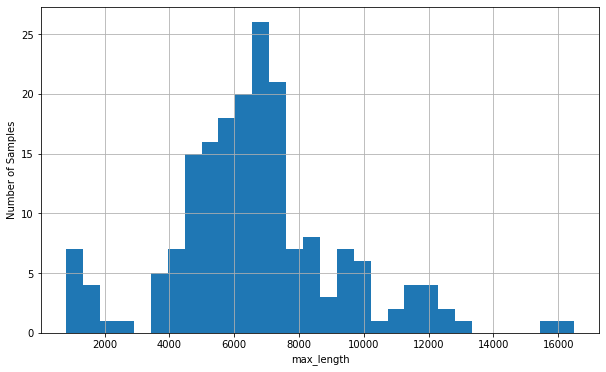

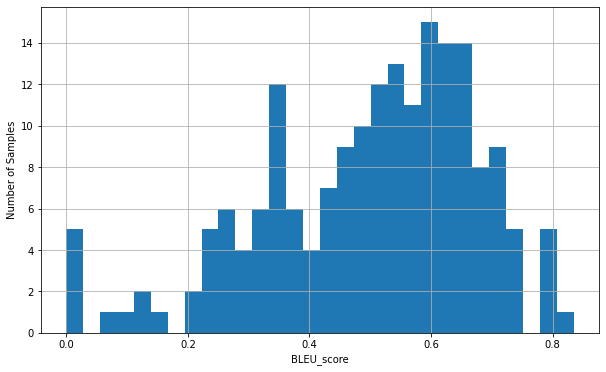

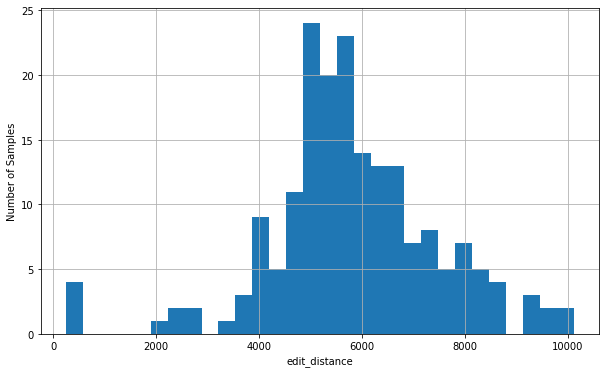

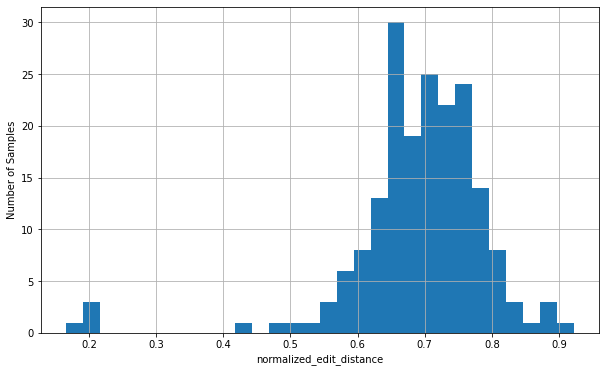

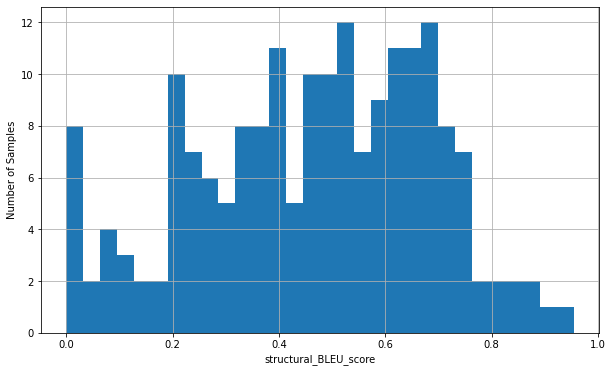

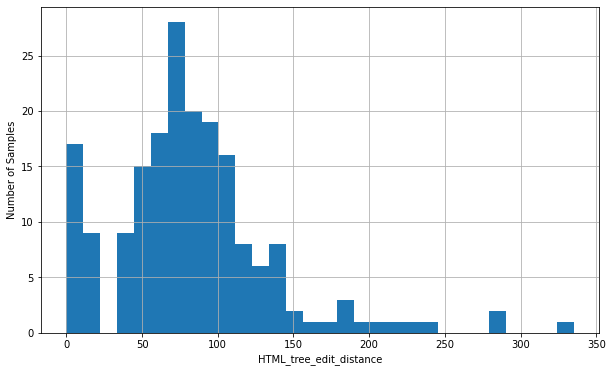

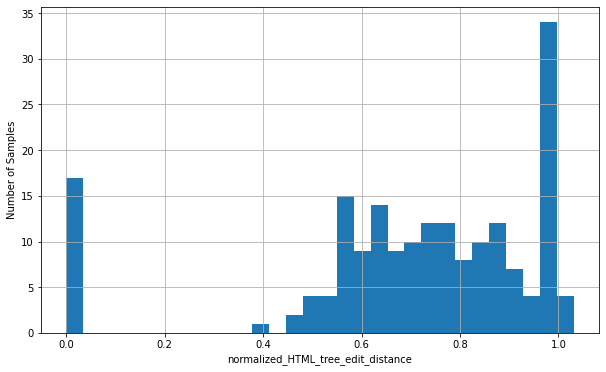

In [31]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance", "structural_BLEU_score", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()
